In [1]:
#Import libraries
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from transformers import pipeline
import matplotlib.pyplot as plt
import warnings
import country_converter as coco
import geonamescache
import us
gc = geonamescache.GeonamesCache()

warnings.simplefilter(action='ignore', category=FutureWarning)

# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
final_df = pd.read_csv("../dataset/final_df.csv")

In [3]:
#Drop Unnamed: 0 column
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
final_df.isnull().sum()

tweet_id            0
tweet_posted_on     0
tweets              0
cleaned_tweets     15
user_location       0
polarity            0
dtype: int64

In [5]:
np.where(final_df['cleaned_tweets'].isnull() == True)

(array([4017, 4018, 5236, 5830, 5929, 5997, 6118, 6307, 6308, 6797, 7734,
        9653, 9864, 9869, 9978]),)

In [6]:
final_df = final_df.dropna().reset_index(drop=True)
# final_df.reset_index(drop=True)
final_df.shape

(10219, 6)

In [7]:
final_df["tweet_word_count"]= final_df['cleaned_tweets'].str.split().map(len)

In [8]:
final_df["tweet_word_count"].sort_values(ascending=False).head()

5812    30
7396    30
5952    29
5470    29
7200    29
Name: tweet_word_count, dtype: int64

In [9]:
final_df['date'] = pd.to_datetime(final_df['tweet_posted_on']).dt.date

<AxesSubplot:xlabel='date'>

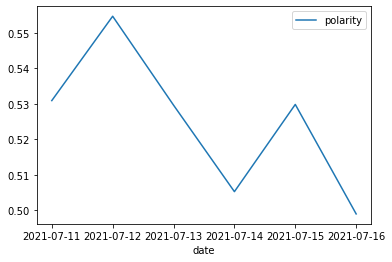

In [10]:
final_df.groupby(by='date')['polarity'].mean().plot(legend=True)

In [11]:
# X = final_df['cleaned_tweets']
# y = final_df['polarity']

In [12]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf = TfidfVectorizer(ngram_range=(1,1),stop_words='english', min_df = 2)

In [13]:
final_df['user_location_cleaned'] = coco.convert(names=final_df['user_location'], to='name_short')

New York, NY not found in regex
London | New York not found in regex
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for 

Betwixt, Herthighs not found in regex
Everywhere not found in regex
Irvine, CA not found in regex
Everywhere not found in regex
Los Angeles, CA not found in regex
San Francisco, CA not found in regex
Ontario, CA not found in regex
Ontario, CA not found in regex
Ontario, CA not found in regex
Ontario, CA not found in regex
Ontario, CA not found in regex
Anywhere not found in regex
Anywhere not found in regex
Anywhere not found in regex
Anywhere not found in regex
Anywhere not found in regex
Everywhere not found in regex
Atlanta, GA not found in regex
Chicago, IL not found in regex
Marina del Rey, CA not found in regex
Recife not found in regex
Worldwide not found in regex
Anywhere not found in regex
Everywhere not found in regex
Remote not found in regex
London | New York not found in regex
Chicago, IL not found in regex
Everywhere not found in regex
New York, NY not found in regex
London | New York not found in regex
Everywhere not found in regex
Irvine, CA not found in regex
Washingto

More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
More then one regular expression match for Australia + New Zealand + Asia
Chicago, IL not found in regex
West Yorkshire not found in regex
Minneapolis, MN not found in regex
Tustin, CA not found in regex
NY Tri-State & Boston not found in regex
Chesapeake, Virginia not found in regex
Ruby World not found in regex
Worldwide not found in regex
Mid-Atlantic not found in regex
London | New York not found in regex
Utah not found in regex
Utah not found in regex
Utah not found in regex
Utah not found in regex
Utah not found in regex
Utah not found in regex

More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression m

More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression m

Everywhere not found in regex
St. Louis, Missouri not found in regex
Global Offices not found in regex
Hyderabad not found in regex
Wellington, FL not found in regex
Worldwide not found in regex
Europe not found in regex
London | New York not found in regex
Everywhere not found in regex
Bay Area, CA not found in regex
Leeds, England not found in regex
Metaverse not found in regex
Remote not found in regex
Detroit not found in regex
USA and UK not found in regex
Worldwide not found in regex
Austin, TX not found in regex
W not found in regex
Boston, MA not found in regex
Chassell, MI not found in regex
London/Boston not found in regex
NYC not found in ISO3
West Virginia not found in regex
Ottawa, Ontario not found in regex
Hermanus , Western Cape  not found in regex
Piscataway, NJ not found in regex
We're remote! not found in regex
harlem, ny not found in regex
Anywhere not found in regex
New York, NY not found in regex
Herndon, VA not found in regex
New York, NY not found in regex
Sheff

More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then 

More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philipp

Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
London, UK not found in regex
Turn 🔔 Notifications ON  not found in regex
Portland, OR not found in regex
San Francisco, CA not found in regex
Anywhere not found in regex
Illinois not found in regex
Ottawa not found in regex
Hollywood, FL not found in regex
Jeddah not found in regex
Remote not found in regex
Chicago, IL not found in regex
Washington, DC not found in regex
Chicago, IL not found in regex
CLT ➡️ ROA not found in regex
Colorado Springs, CO not found in regex
in the Cloud not found in regex
#RemoteWork #Boston  not found in regex
127.0.0.1 not found in regex
8-County Madison, WI Region not found in regex
Worldwide not found in regex
Global not found in regex
Global not found in regex
Benito Juárez not found in regex
Bucharest not found in regex
Worldwide not found in regex
#RemoteWork #Boston  not found in regex
Washington, DC 20009 not found in regex
Vancouver (via Edmonton) not found in

More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then 

Boston, MA not found in regex
Remote not found in regex
Florida, USA not found in regex
#RemoteWork #Boston  not found in regex
#RemoteWork #Boston  not found in regex
Turn 🔔 Notifications ON  not found in regex
Chicago, Nashville not found in regex
New York, New York not found in regex
Worldwide not found in regex
Chicago, Nashville not found in regex
Anywhere not found in regex
London | New York not found in regex
Chicago, IL not found in regex
Solihull, B90 8AG, UK not found in regex
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular exp

More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression match for USA, Canada and Australia
More then one regular expression m

Chandler, AZ not found in regex
Des Moines, IA not found in regex
Sarrbrüken not found in regex
Cincinnati, OH not found in regex
Raleigh, NC not found in regex
Worldwide not found in regex
Everywhere not found in regex
Worldwide not found in regex
Worldwide not found in regex
Cambridge, MA not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
#Remotely not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Ontario, CA not found in regex
Worldwide not found in regex
Ontario, CA not found in regex
Worldwide not found in regex
Ontario, CA not found in regex
Ontario, CA not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Boston, MA not found in regex
Worldwide not found in regex
Worldwide not found in regex
Everywhere not found in regex
Worldwide not found in regex
Worldwide no

Worldwide not found in regex
DC not found in ISO2
Anywhere not found in regex
Eastern Ontario not found in regex
España not found in regex
LONDON not found in regex
Appalachia USA not found in regex
Worldwide not found in regex
Florida not found in regex
Chassell, MI not found in regex
Raleigh, NC not found in regex
Town 'n' Country, FL not found in regex
Earth not found in regex
Connecticut not found in regex
Pune not found in regex
Los Angeles, CA not found in regex
London not found in regex
Austin not found in regex
Denver, CO not found in regex
London, UK not found in regex
London, UK not found in regex
Internet not found in regex
Raleigh, NC not found in regex
Chapel Hill, NC not found in regex
London, England not found in regex
Boston, Massachusetts not found in regex
Worldwide not found in regex
London, England not found in regex
Gilbert, AZ not found in regex
Aldgate, London E1 not found in regex
Manila City, National Capital  not found in regex
We are a remote team! not found 

Somerset West not found in regex
London, England not found in regex
World not found in regex
Azatlanta, New Mexico not found in regex
Hamburg, Deutschland not found in regex
Teddington not found in regex
London, England not found in regex
Surrey UK not found in regex
Bayern, Deutschland not found in regex
Earth not found in regex
Xscape, Milton Keynes, England not found in regex
Chicago, IL not found in regex
Kampala not found in regex
Internet not found in regex
London not found in regex
London not found in regex
Worldwide not found in regex
Europe not found in regex
London, England not found in regex
London, England not found in regex
Worldwide not found in regex
brexiled from EU 🇪🇺 not found in regex
Dayton  #Texas, 77535 not found in regex
Anywhere not found in regex
London | Toulouse not found in regex
Delhi not found in regex
Folkestone not found in regex
Global not found in regex
Texas, USA not found in regex
Texas, USA not found in regex
Chicago, IL not found in regex
Chicago, 

Worldwide not found in regex
Chicago, Illinois not found in regex
Town 'n' Country, FL not found in regex
New York not found in regex
Chicago, IL not found in regex
Vancouver, BC not found in regex
New Jersey not found in regex
Online Directory not found in regex
Worldwide not found in regex
Nottingham, England not found in regex
Orlando, FL not found in regex
Home not found in regex
Hyderabad not found in regex
Worldwide not found in regex
San Francisco, CA not found in regex
Worldwide not found in regex
Where Are We Now? not found in regex
Boston, MA not found in regex
Delmar, New York not found in regex
Peachtree City, GA not found in regex
San Diego, California not found in regex
Austin, TX not found in regex
Surrey UK not found in regex
Ruby World not found in regex
Anywhere not found in regex
124 E Olive Avenue Burbank, CA not found in regex
Worldwide not found in regex
BsAs not found in regex
More then one regular expression match for United States & India 
More then one regular

More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philipp

More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Zealand/USA/Thailand
More then one regular expression match for New Z

More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philipp

Seattle, WA not found in regex
seattle.wa.earth.sol.orion.mw not found in regex
Columbus, OH not found in regex
Earth not found in regex
Chicago, IL not found in regex
Pasadena, CA not found in regex
Digital By Default not found in regex
Worldwide not found in regex
Surrey UK not found in regex
Bay Area, California not found in regex
Blue Bell, PA not found in regex
Orlando, FL not found in regex
Chicago, IL not found in regex
Orange County, California not found in regex
San Francisco, CA not found in regex
Chicago, IL not found in regex
Saratoga Springs, NY not found in regex
More then one regular expression match for Australia, New Zealand, USA
More then one regular expression match for Australia, New Zealand, USA
More then one regular expression match for Australia, New Zealand, USA
More then one regular expression match for Australia, New Zealand, USA
More then one regular expression match for Australia, New Zealand, USA
More then one regular expression match for Australia, New Zea

More then one regular expression match for Canada & United States
More then one regular expression match for Canada & United States
More then one regular expression match for Canada & United States
More then one regular expression match for Canada & United States
More then one regular expression match for Canada & United States
More then one regular expression match for Canada & United States
Lakewood Ranch, Fl not found in regex
Brand Beyond Product ▶️Sign up not found in regex
San Francisco Bay Area not found in regex
Glocal // SoFL not found in regex
Los Angeles not found in regex
Seattle | ♥️ SF Bay Area | 🌎 not found in regex
Global not found in regex
nairobi  not found in regex
Chicago, IL not found in regex
Los Angeles, CA not found in regex
Surrey UK not found in regex
Anywhere not found in regex
San Francisco, CA not found in regex
Boston, MA not found in regex
Cowes, England not found in regex
San Francisco, CA not found in regex
Worldwide not found in regex
Toronto, Ontario 

More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then one regular expression match for Belgium, USA, Pakistan
More then 

Remote  not found in regex
Austin, TX not found in regex
Oakville, Ontario not found in regex
Cincinnati, OH not found in regex
Nashville, TN not found in regex
Houston, TX not found in regex
Surrey UK not found in regex
Buffalo, NY & Dallas, TX not found in regex
Frome, England not found in regex
Dallas & Bangalore not found in regex
St. Louis, Missouri not found in regex
Madison, WI not found in regex
Worldwide via Los Angeles, CA not found in regex
Bridgewater, NJ not found in regex
Washington, D.C.  not found in regex
Sunrise 1401 Sawgrass Corporate Parkway Sunrise, FL 33323 not found in regex
New York, NY not found in regex
London not found in regex
London, England not found in regex
London, England not found in regex
Flutterverse not found in regex
Worldwide not found in regex
Global (HQ: Teaneck, N.J.) not found in regex
Anywhere not found in regex
Westbury, NY not found in regex
Manchester, NH not found in regex
California, USA not found in regex
London | New York not found in 

Worldwide not found in regex
UAE not found in ISO3
Aldgate, London E1 not found in regex
#RemoteWork #Boston  not found in regex
Nottingham not found in regex
Bitcoin not found in regex
England, UK 🇪🇺 not found in regex
North Carolina, USA not found in regex
Atlanta, Ga not found in regex
Steeple Claydon, England not found in regex
Ontario, CA not found in regex
Belgrade not found in regex
Chicago, IL not found in regex
New York   not found in regex
London, England not found in regex
Turn 🔔 Notifications ON  not found in regex
London, England not found in regex
Everywhere not found in regex
Wilmington, New Castle not found in regex
Ballston Spa not found in regex
Cambridge, MA, USA not found in regex
ÜT: -27.784,-64.263 to Global not found in regex
Vancouver, BC not found in regex
900 Biscayne Blvd, Miami, FL not found in regex
Boston, MA not found in regex
Auburn, WA not found in regex
Worldwide not found in regex
El Mundo not found in regex
Parsippany, NJ not found in regex
Chicago, 

More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
More then one regular expression match for Australia | Philippines
Worldwide not found in regex
#Remotely not found in regex
Internet not found in regex
Southern California not found in regex
UK not found in ISO2
Chicago, IL, US not found in regex
Indiana, USA not found in regex
Indianapolis, IN not found in regex
Indianapolis, IN not found in regex
Indiana, USA not found in regex
Indianapolis, IN not found in regex
Chicago, IL, US not found in regex
Hessle, U

Orlando, FL not found in regex
Montréal, Québec not found in regex
Owings Mills, MD not found in regex
Miami, FL not found in regex
London | New York not found in regex
NW Ohio, USA not found in regex
NW Ohio, USA not found in regex
Orlando, Florida not found in regex
Cupertino, CA not found in regex
Ruby World not found in regex
Remote not found in regex
Temecula, CA not found in regex
Worldwide not found in regex
Toronto, ON not found in regex
Atlanta, GA not found in regex
Chicago, IL not found in regex
Sydney not found in regex
Nashville, TN not found in regex
Redmond, Washington not found in regex
Nashville, TN not found in regex
Global not found in regex
Worldwide not found in regex
Somewhere in GA not found in regex
Turn 🔔 Notifications ON  not found in regex
Turn 🔔 Notifications ON  not found in regex
Turn 🔔 Notifications ON  not found in regex
Worldwide not found in regex
Durham, NC not found in regex
Turn 🔔 Notifications ON  not found in regex
Portland, OR not found in regex


San Diego not found in regex
San Diego, CA not found in regex
San Diego, CA not found in regex
San Diego, CA. not found in regex
New York City not found in regex
Indianapolis, IN not found in regex
Chicago, IL not found in regex
MA: 40.758348,-73.986972 not found in regex
Reston, VA not found in regex
Dallas, TX not found in regex
Newton, MA not found in regex
Florida not found in regex
Florida not found in regex
Worldwide not found in regex
San Francisco, CA not found in regex
Ciudad de la imagen not found in regex
Surrey UK not found in regex
Buffalo, NY & Dallas, TX not found in regex
Las Vegas, NV not found in regex
Pinehurst, NC not found in regex
San Francisco, CA not found in regex
Remote not found in regex
127.0.0.1 not found in regex
Chicago, Illinois not found in regex
California, USA not found in regex
Chicago, IL not found in regex
Sun Prairie, WI not found in regex
Calgary, Alberta not found in regex
Salt Lake City area not found in regex
Dallas, TX not found in regex
Seat

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match for Sydney | Hong Kong | Singapore
More then one regular expression match

Kansas City not found in regex
New Delhi not found in regex
Attleborough, Norfolk UK not found in regex
London not found in regex
Norfolk not found in regex
UK not found in ISO2
Belfast, Northern Ireland not found in regex
Branson, MO not found in regex
Ware, Hertfordshire not found in regex
Bay Area, CA not found in regex
Ahmedabad not found in regex
Chicago not found in regex
Chicago not found in regex
Midwest America not found in regex
Midwest America not found in regex
Washington DC not found in regex
Marattahalli, Bengaluru South not found in regex
Luton, England not found in regex
London, England not found in regex
book/author info at not found in regex
DUBAI not found in regex
Worldwide not found in regex
Worldwide not found in regex
Kansas City not found in regex
Start Winning At LIFE HERE 👉 not found in regex
book/author info at not found in regex
Kansas City, USA not found in regex
London not found in regex
Everywhere not found in regex
Liverpool not found in regex
Bangalore 

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

MUMBAI not found in regex
NY not found in ISO2
Houma, LA not found in regex
The World not found in regex
Chicago, IL not found in regex
North Carolina, USA not found in regex
Poole, England not found in regex
Worldwide not found in regex
Austin, TX not found in regex
Everywhere not found in regex
La Porte, Texas not found in regex
|here.now| not found in regex
Worldwide not found in regex
Tampa, FL not found in regex
Washington, DC not found in regex
Washington, DC not found in regex
Los Angeles, CA not found in regex
Vancouver  not found in regex
New Hampshire, USA not found in regex
Denver, CO not found in regex
Gunter Texas not found in regex
Worldwide not found in regex
Worldwide not found in regex
Mumbai not found in regex
Mumbai not found in regex
Mumbai not found in regex
North Carolina not found in regex
San Francisco not found in regex
กรุงเทพมหานคร not found in regex
Ankara not found in regex
Garden City, NY not found in regex
Bursa not found in regex
Chennai not found in reg

More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regular expression match for NY, VA, Canada, UK, Mexico
More then one regula

More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
Surrey not found in regex
Stockton, California not found in regex
Sussex, England not found in regex
Kent, UK not found in regex
Buckinghamshire not found in regex
Berkshire not found in regex
Bedfordshire, England not found in regex
Oxfordshire not found in regex
Mumbai not found in regex
Surrey not found in regex
São Paulo, Brasil not found in regex
HQ: JOS :...Lagos~Abj~Owerri not found in regex
UK not found in ISO2
 Enniskillen not found in regex
Antwerpen-Worldwide not found in r

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

Mabalacat City Pampanga not found in regex
Hyderabad  not found in regex
Washington, DC not found in regex
Chesapeake, VA not found in regex
Europe not found in regex
Cyberspace not found in regex
Wherever you are. not found in regex
Internet not found in regex
Internet not found in regex
Penrith, Sydney not found in regex
WorldWide not found in regex
Earth  not found in regex
DC area not found in regex
Global not found in regex
Minnesota not found in regex
Worldwide not found in regex
Dorset, UK not found in regex
Brooklyn, NY not found in regex
Earth not found in regex
Jammu And Kashmir not found in regex
Worldwide not found in regex
Eagleville, PA not found in regex
Pluto not found in regex
Central Visayas, Republic of t not found in regex
Poblacion, Talibon, Bohol not found in regex
Brisbane, Queensland not found in regex
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one 

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

National Service not found in regex
North Hollywood, CA not found in regex
Rockville, Cleveland, New York not found in regex
World not found in regex
San Clemente, CA not found in regex
Lake Tahoe, NV not found in regex
Oregon, USA not found in regex
Louisville, KY not found in regex
Town 'n' Country, FL not found in regex
Leeds, UK not found in regex
Tennessee not found in regex
Durham, NC not found in regex
Austin, TX not found in regex
AWS | Azure | GCP | Cloud not found in regex
Your Network not found in regex
Cloud Engineer not found in regex
Minneapolis, MN not found in regex
Ohio, USA not found in regex
Mumbai not found in regex
Raleigh, NC not found in regex
New York not found in regex
More then one regular expression match for Kenya || Uganda 
More then one regular expression match for Kenya || Uganda 
More then one regular expression match for Kenya || Uganda 
More then one regular expression match for Kenya || Uganda 
More then one regular expression match for Kenya || Ugand

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

Hot Springs, Ar not found in regex
Charlotte, NC not found in regex
Sydney, New South Wales not found in regex
Annapolis Valley, NS not found in regex
East Coast, USA not found in regex
Washington, DC not found in regex
Toronto not found in regex
Vancouver BC not found in regex
Philadelphia, PA, USA not found in regex
Dorking, England not found in regex
Atlanta, GA not found in regex
Mumbai not found in regex
Brantford, Ontario not found in regex
St Petersburg, FL not found in regex
Tempe Arizona not found in regex
Delhi not found in regex
London, England not found in regex
Wrexham, Wales (UK) not found in regex
Worldwide not found in regex
UK not found in ISO2
NY not found in ISO2
Greenhills, Mandaluyong, Phil. not found in regex
Kansas not found in regex
Taunton, UK not found in regex
Worldwide not found in regex
Bay Area, CA not found in regex
Mississauga & Toronto, Ontario not found in regex
Texas, USA not found in regex
Mission Viejo, CA not found in regex
Global not found in rege

Start Winning At LIFE HERE 👉 not found in regex
Worldwide not found in regex
Amphoe Pak Chong not found in regex
Bristol, England not found in regex
Everywhere not found in regex
Vancouver BC not found in regex
Online Directory not found in regex
Dindigul not found in regex
137 Hennie Alberts Brackenhurs not found in regex
Attleborough, Norfolk UK not found in regex
Chennai not found in regex
perambalur not found in regex
Charlotte, North Carolina not found in regex
New not found in ISO3
California not found in regex
Birmingham, England not found in regex
Renton, WA not found in regex
Derby not found in regex
Jammu And Kashmir not found in regex
Earth  not found in regex
GMT+8 not found in regex
WorldWide not found in regex
269-MB, DHA Phase 6, Lahore not found in regex
Ulm not found in ISO3
Vancouver BC not found in regex
Bangkok not found in regex
London, England not found in regex
ÜT: -6.1567603,106.8367213 not found in regex
Vancouver, BC not found in regex
Mumbai/Kolkata not found

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then one regular expression match for United States & Mexico
More then 

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

Morgan City, LA 70380 not found in regex
Jalisco, México-retired Iowan not found in regex
South Shields, England not found in regex
Manchester uk not found in regex
Edmonton, Alberta not found in regex
Memphis, TN not found in regex
Vancouver BC not found in regex
kings lynn norfolk not found in regex
Michigan, USA not found in regex
Christchurch, England not found in regex
El Segundo, CA not found in regex
Jacksonville, fl not found in regex
Toronto, ON not found in regex
Jalisco, México-retired Iowan not found in regex
Phoenix, AZ not found in regex
Everywhere not found in regex
Worldwide not found in regex
Burnham-on-Sea, England not found in regex
Boston, MA not found in regex
Worcester, England not found in regex
Mumbai not found in regex
AccheyDin not found in regex
St.Louis, Mo not found in regex
Thane| Mumbai | Pune not found in regex
Brent, London not found in regex
Brent, London not found in regex
California, USA not found in regex
Vancouver BC not found in regex
North Caroli

More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China,

More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China, Canada
More then one regular expression match for US, UK, India, China,

Birmingham not found in regex
South Carolina, USA not found in regex
San Francisco not found in regex
Madras not found in regex
Dumka,Jharkhand not found in regex
Online Directory not found in regex
Online Directory not found in regex
Dakota Dunes, SD not found in regex
Pune not found in regex
Washington DC not found in regex
Dumka,Jharkhand not found in regex
Milton Keynes, England not found in regex
Worldwide not found in regex
Durban, KwaZulu Natal not found in regex
Berlin not found in regex
New not found in ISO3
Skipton, NORTH YORKSHIRE not found in regex
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 6324
More then one regular expression match for Mahagbu, Trinidad, Bohol 

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

AJMER not found in regex
Worldwide not found in regex
Dumka,Jharkhand not found in regex
The Internet not found in regex
National Capital Region not found in regex
नई दिल्ली, भारत not found in regex
नई दिल्ली, भारत not found in regex
Gloucestershire, South West UK not found in regex
Los Angeles & Chicago not found in regex
கன்னியாகுமரி not found in regex
கன்னியாகுமரி not found in regex
Kampala not found in regex
New York, NY not found in regex
Dumka,Jharkhand not found in regex
Dumka,Jharkhand not found in regex
united state not found in regex
Laguna Niguel, CA not found in regex
Dumka,Jharkhand not found in regex
North Carolina not found in regex
Worldwide not found in regex
Mumbai not found in regex
North Carolina not found in regex
North Carolina not found in regex
México not found in regex
Tegucigalpa not found in regex
Dumka,Jharkhand not found in regex
13.7541,100.532234 not found in regex
North Carolina, USA not found in regex
Bournemouth, England not found in regex
Worldwide no

More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australia Hong Kong Singapore
More then one regular expression match for Australi

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

North Carolina not found in regex
Crawley, England not found in regex
North Carolina not found in regex
New Milford CT not found in regex
UK not found in ISO2
Change Your Life 🥂 not found in regex
Everywhere not found in regex
Knutsford, England not found in regex
Kingston upon Hull not found in regex
London, England not found in regex
Bronx, NY not found in regex
Washington DC not found in regex
USA  not found in regex
Mesa, AZ not found in regex
Everywhere not found in regex
Huntington, WV not found in regex
Everywhere not found in regex
London not found in regex
London not found in regex
London not found in regex
$10 Startup | Google Page 1 not found in regex
Dumka,Jharkhand not found in regex
Maryland not found in regex
London not found in regex
London not found in regex
London not found in regex
Guildford, Surrey not found in regex
London not found in regex
London not found in regex
167 Arthur Rd, Wimbledon Park not found in regex
London not found in regex
3rd Rock From The Sun no

More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression matc

More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression matc

More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
More then one regular expression match for DM for promotions.
Ghana, Africa, US, Canada, UK, Europe, Asia.
Dumka,Jharkhand not found in regex
Washington DC not found in regex
Global not found in regex
Town 'n' Country, FL not found in regex
Watford, H

Iloilo City, Western Visayas not found in regex
London, England not found in regex
North Carolina, USA not found in regex
Anywhere not found in regex
Global not found in regex
Madikeri not found in regex
Denver, CO not found in regex
Bournemouth, England not found in regex
Durham, NC not found in regex
Earth not found in regex
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular

More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular expression match for Gold Coast, Australia
More then one regular exp

Mesa, AZ not found in regex
Worldwide not found in regex
Boynton Beach, Florida not found in regex
South West, England not found in regex
Ottawa, Ontario not found in regex
California not found in regex
Niagara Falls Ontario not found in regex
127.0.0.1 not found in regex
Köln, Deutschland not found in regex
Gloucestershire, South West UK not found in regex
#Hyderabad #CYBERABAD  not found in regex
Louisville, KY not found in regex
California not found in regex
Washington DC not found in regex
South Carolina, USA not found in regex
Oklahoma not found in regex
Maryland, USA not found in regex
Staten Island, NY not found in regex
Vancouver BC not found in regex
St Albans not found in regex
Kansas City, Missouri not found in regex
Raleigh, NC not found in regex
uk not found in ISO2
Anywhere not found in regex
Boynton Beach, Florida not found in regex
Earth not found in regex
Miami, FL not found in regex
Mumbai not found in regex
Mumbai not found in regex
North Carolina, USA not found in r

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match for Kenya UK Barbados Australia US
More then one regular expression match

Bay Area, CA not found in regex
Ipswich, England not found in regex
Everywhere not found in regex
Louisville, KY not found in regex
Mumbai not found in regex
Global not found in regex
Location not found in regex
North America not found in regex
Myrtle Beach, SC not found in regex
San Francisco, California  not found in regex
Anywhere not found in regex
At home. Dressed comfortably. not found in regex
Knoxville, TN  🇺🇸 not found in regex
Houston, TX not found in regex
Watford, Hertfordshire, UK not found in regex
Knoxville, TN not found in regex
Minneapolis, MN not found in regex
no where not found in regex
Knoxville, TN  🇺🇸 not found in regex
Toronto, Ontario not found in regex
Dumka,Jharkhand not found in regex
Everywhere not found in regex
WorldWide not found in regex
Everywhere not found in regex
Vancouver, BC not found in regex
Worldwide not found in regex


In [14]:
gc.get_cities_by_name('London')

[{'6058560': {'geonameid': 6058560,
   'name': 'London',
   'latitude': 42.98339,
   'longitude': -81.23304,
   'countrycode': 'CA',
   'population': 346765,
   'timezone': 'America/Toronto',
   'admin1code': '08',
   'alternatenames': ['Landona',
    'London',
    'Londonas',
    'Londono',
    'YXU',
    'leondeon',
    'lndn',
    'lndn  antaryw',
    'londoni',
    'lun dui',
    'lun dun',
    'lwndwn',
    'rondon',
    'Лондон',
    'לונדון',
    'لندن',
    'لندن، انتاریو',
    'لندن، اونٹاریو',
    'ლონდონი',
    'ロンドン',
    '伦敦',
    '런던']}},
 {'2643743': {'geonameid': 2643743,
   'name': 'London',
   'latitude': 51.50853,
   'longitude': -0.12574,
   'countrycode': 'GB',
   'population': 7556900,
   'timezone': 'Europe/London',
   'admin1code': 'ENG',
   'alternatenames': ['ILondon',
    'LON',
    'Lakana',
    'Landan',
    'Landen',
    'Ljondan',
    'Llundain',
    'Lodoni',
    'Londain',
    'Londan',
    'Londar',
    'Londe',
    'Londen',
    'Londin',
    'Londini

In [15]:
def get_cities_by_country(code):
    cities = []
    for city in gc.get_cities().values():
        if (city['countrycode'] == code) and (len(city['name']) > 3):
            cities.append(city['name'])
    return list(map(lambda x: x.lower(), cities));

In [16]:
def getstates_cities():
    usa_state_names = [state.name.lower() for state in us.states.STATES_AND_TERRITORIES]
    return get_cities_by_country('US') + usa_state_names;
usa_state_cities_names = getstates_cities()
indian_cities = get_cities_by_country('IN')
uk_cities = get_cities_by_country('GB')

In [17]:
def checkForUSA(location):
    country = location;
    if location.lower().find('usa') != -1 or location.lower().find('united states of america') != -1 or location.lower().find('united states') != -1:
        country = 'USA'
    elif us.states.lookup(location.split(',')[-1].strip()) != None  or  location.lower().find('america') != -1 or location.lower().find('u.s.a.') != -1:  
        country = 'USA'
    else:    
        for state_city in usa_state_cities_names:
            if location.lower().find(state_city) != -1:
                country = 'USA'
                break;
    return country

In [18]:
def check_for_india(location):
    country = location;
    if location.lower().find('india') != -1:
        country = 'India'
    else:    
        for cities in indian_cities:
            if location.lower().find(cities) != -1:
                country = 'India'
                break;
    return country    

In [19]:
def check_for_uk(location):
    country = location;
    if location.lower().find('uk') != -1 or location.lower().find('britan') != -1 or location.lower().find('united kingdom') != -1:
        country = 'United Kingdom'
    else:    
        for cities in uk_cities:
            if location.lower().find(cities) != -1:
                country = 'United Kingdom'
                break;
    return country    

In [20]:
def check_for_others(location):
    country = location;  
    dicts = gc.get_countries_by_names();
    for country_name,data in dicts.items():
        if location.lower().find(country_name.lower()) != -1:
            return country_name
    return country    

In [21]:
len(indian_cities)

2449

In [22]:
final_df['user_location_cleaned'] = final_df['user_location'].map(checkForUSA)

In [23]:
final_df['user_location_cleaned'] = final_df['user_location_cleaned'].map(check_for_india)

In [24]:
final_df['user_location_cleaned'] = final_df['user_location_cleaned'].map(check_for_uk)

In [25]:
final_df['user_location_cleaned'] = final_df['user_location_cleaned'].map(check_for_others)

In [26]:
final_df['user_location_cleaned'].value_counts()

USA                           4441
United Kingdom                 959
India                          870
Worldwide                      661
Everywhere                     204
                              ... 
Thornhill                        1
Where the SOLUTIONS are !😉       1
Cebu City                        1
hope.com                         1
Currin, An Tearmann              1
Name: user_location_cleaned, Length: 795, dtype: int64

In [27]:
final_df['user_location_cleaned'] = coco.convert(names=final_df['user_location_cleaned'], to='name_short')

Everywhere not found in regex
Global not found in regex
The Matrix not found in regex
Global not found in regex
Worldwide not found in regex
Worldwide not found in regex
Planet Earth not found in regex
Planet Earth not found in regex
Sydney, New South Wales not found in regex
Everywhere not found in regex
Everywhere not found in regex
Global not found in regex
Global not found in regex
Global not found in regex
Global not found in regex
Global not found in regex
Global not found in regex
Hometown not found in regex
MUC | EU  not found in regex
Remote not found in regex
Porto not found in regex
Worldwide not found in regex
Mars not found in regex
Global not found in regex
Global not found in regex
The cloud! not found in regex
Global not found in regex
Anywhere not found in regex
Medellin not found in regex
D.M.V. not found in regex
Remote not found in regex
Everywhere not found in regex
Worldwide not found in regex
Planet Earth not found in regex
Caracas not found in regex
My Home Offi

Worlwide not found in regex
West Sussex - 01293 300 020 not found in regex
Dubai, UAE not found in regex
Remote not found in regex
Anywhere not found in regex
Appalachia  not found in regex
West Sussex - 01293 300 020 not found in regex
Worldwide not found in regex
Neither here nor there not found in regex
Tenerife not found in regex
Worldwide not found in regex
Everywhere not found in regex
Darmstadt, Deutschland not found in regex
West Sussex - 01293 300 020 not found in regex
Worldwide not found in regex
Worldwide not found in regex
Cochrane, AB not found in regex
Worldwide not found in regex
Rovaniemi, Suomi not found in regex
Worldwide not found in regex
Worldwide not found in regex
Zürich, Schweiz not found in regex
Europe not found in regex
City of Tagaytay not found in regex
Everywhere not found in regex
Global not found in regex
Glocal // SoFL not found in regex
Deutschland not found in regex
Anywhere not found in regex
Earth not found in regex
Global not found in regex
Remote

Turn 🔔 Notifications ON  not found in regex
Worldwide not found in regex
Anywhere not found in regex
Turn 🔔 Notifications ON  not found in regex
worldwide not found in regex
Bucharest not found in regex
Worldwide not found in regex
Anywhere not found in regex
Remote  not found in regex
Global🌏 not found in regex
Global not found in regex
Global not found in regex
Global not found in regex
Worldwide not found in regex
127.0.0.1 not found in regex
NYC/HOU/SEA not found in regex
SoCal Rotating link below not found in regex
Worldwide not found in regex
Up Nort not found in regex
Bali, Indonesien not found in regex
#WorkAnywhere not found in regex
Sarrbrüken not found in regex
Worldwide not found in regex
Everywhere not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex
#Remotely not found in regex
Worldwide not found in regex
Worldwide not found in regex
Worldwide not found in regex

Worldwide not found in regex
Online Directory not found in regex
Online Directory not found in regex
☁️ not found in ISO2
Worldwide not found in regex
ATL not found in ISO3
Ruby World not found in regex
Everywhere not found in regex
Worldwide not found in regex
Anywhere not found in regex
Turn 🔔 Notifications ON  not found in regex
Earth  not found in regex
Prague not found in regex
Earth not found in regex
🇺🇸 M.4.G.4.🇺🇸  IFB4P 🦅 🏈 not found in regex
Pondlife ▶️Sign up  not found in regex
Brand Beyond Product ▶️Sign up not found in regex
Global not found in regex
Worldwide not found in regex
Fully Remote not found in regex
Turn 🔔 Notifications ON  not found in regex
Internet not found in regex
Global not found in regex
Worldwide not found in regex
Online Directory not found in regex
Worldwide not found in regex
Home not found in regex
Worldwide not found in regex
Worldwide not found in regex
Where Are We Now? not found in regex
Ruby World not found in regex
Anywhere not found in regex


Anywhere in the world not found in regex
Anywhere in the world not found in regex
Worldwide not found in regex
Worldwide not found in regex
Turn 🔔 Notifications ON  not found in regex
Remote not found in regex
Dartmouth not found in regex
with host Kevin Craine not found in regex
Global not found in regex
Global not found in regex
Remote not found in regex
Hometown not found in regex
കേരളം not found in regex
Worldwide not found in regex
Metaverse not found in regex
Internet not found in regex
Online Directory not found in regex
Zürich, Schweiz not found in regex
Worldwide not found in regex
Toronto not found in regex
180+ countries not found in regex
Everywhere not found in regex
Worldwide not found in regex
Worldwide not found in regex
127.0.0.1 not found in regex
Earth not found in regex
Global not found in regex
Everywhere not found in regex
Anywhere in the world not found in regex
Everywhere and nowhere not found in regex
Anywhere not found in regex
Land Where God Sleeps  not found

Internet not found in regex
in the Cloud not found in regex
Online Directory not found in regex
Global  not found in regex
Virtually anywhere not found in regex
Worldwide not found in regex
Everywhere not found in regex
Everywhere not found in regex
Internet not found in regex
Internet not found in regex
#codedaily not found in regex
#codedaily not found in regex
#codedaily not found in regex
#codedaily not found in regex
#codedaily not found in regex
Emeryvi not found in regex
Earth not found in regex
കേരളം not found in regex
Montréal, Québec not found in regex
Worldwide not found in regex
Earth not found in regex
#codedaily not found in regex
Internet not found in regex
Lotte - Wersen not found in regex
Europe not found in regex
127.0.0.1 not found in regex
127.0.0.1 not found in regex
Everywhere not found in regex
Remote not found in regex
Global not found in regex
Everywhere not found in regex
Remote not found in regex
Worldwide not found in regex
Deutschland not found in regex
Rem

#Remotely not found in regex
Planet Earth not found in regex
Gurugram not found in regex
Worldwide not found in regex
Worldwide not found in regex
Europe, Middle East and Africa not found in regex
#Remotely not found in regex
Zylinc HQ, Hellerup not found in regex
Anywhere not found in regex
Everywhere not found in regex
Worldwide not found in regex
Zürich, Schweiz not found in regex
Turn 🔔 Notifications ON  not found in regex
Turn 🔔 Notifications ON  not found in regex
Earth  not found in regex
Brackley, Northants NN13 5HQ not found in regex
Global not found in regex
127.0.0.1 not found in regex
#codedaily not found in regex
Worldwide not found in regex
Worldwide not found in regex
Hogwarts, Always not found in regex
NYC - LON - SIN - BALI not found in regex
Worldwide not found in regex
Anywhere not found in regex
Turn 🔔 Notifications ON  not found in regex
Everywhere not found in regex
Worldwide not found in regex
Carnegie, VIC, AU, 3163 not found in regex
Worldwide not found in rege

Bhopal Madhya Pradesh not found in regex
Bhopal Madhya Pradesh not found in regex
Съединени щати not found in regex
Internet not found in regex
www.MarketingMasterminds.org not found in regex
Berlin not found in regex
Sarrbrüken not found in regex
Sarrbrüken not found in regex
Montreal & Terra not found in regex
$10 Startup | Google Page 1 not found in regex
Worldwide- from your home not found in regex
Toronto not found in regex
Surrey not found in regex
www.MarketingMasterminds.org not found in regex
www.MarketingMasterminds.org not found in regex
www.MarketingMasterminds.org not found in regex
In the shower not found in regex
Worldwide not found in regex
Worldwide not found in regex
WORLD CITIZEN💙 DM-FREE ZONE not found in regex
Worldwide not found in regex
Worldwide not found in regex
Global not found in regex
Worldwide not found in regex
ATL and PGH not found in regex
Haryana not found in regex
Berlin not found in regex
Chilworth, England not found in regex
Chilworth, England not f

Ankara not found in regex
Carnegie, VIC, AU, 3163 not found in regex
Ankara not found in regex
Izmir not found in regex
Adana not found in regex
Istanbul not found in regex
Istanbul not found in regex
Izmir not found in regex
Adana not found in regex
Izmir not found in regex
Ankara not found in regex
Ankara not found in regex
Bursa not found in regex
Worldwide not found in regex
📸 Headshot by @mchungphoto not found in regex
#codedaily not found in regex
Earth not found in regex
Worldwide not found in regex
Europe not found in regex
Roodehek Street, Cape Town not found in regex
Dubai, UAE not found in regex
East Coast not found in regex
Edmonton, Alberta not found in regex
Global not found in regex
Stockholm not found in regex
தல மனதில் not found in regex
Carnegie, VIC, AU, 3163 not found in regex
Worldwide not found in regex
In Transit Right Now  not found in regex
World Wide Web not found in regex
The 402 not found in regex
somewhere in the suburbs... not found in regex
ระยอง, ประเทศไ

The Hive Blockchain not found in regex
Global not found in regex
🇬🇧  not found in ISO3
Metaverse not found in regex
Worldwide not found in regex
19120 Grand River Ave Unit15 not found in regex
Southern Ca. not found in regex
the south of Weißwurstäquator not found in regex
He/Him/The Moment not found in regex
AVL not found in ISO3
Male' not found in regex
Everywhere not found in regex
Istanbul not found in regex
Europe not found in regex
Berkshire not found in regex
Sydney, New South Wales not found in regex
Toronto not found in regex
Worldwide not found in regex
Worldwide not found in regex
Global not found in regex
Earth not found in regex
Worldwide not found in regex
Citizen of The World not found in regex
Merthyr.  not found in regex
Everywhere not found in regex
Citizen of The World not found in regex
Montréal, Qc not found in regex
Trivandrum, Kerala not found in regex
Worldwide not found in regex
Worldwide not found in regex
New not found in ISO3
Africa not found in regex
Global

GTA  not found in regex
Bologna not found in regex
Everywhere not found in regex
Worldwide not found in regex
iPhone: 35.698898,-82.573883 not found in regex
5401 W. Kennedy Blvd., Ste 100 not found in regex
Cryptoverse not found in regex
Istanbul not found in regex
Worldwide not found in regex
Jehanabad not found in regex
World Wide Web not found in regex
Barrie not found in regex
World Wide not found in regex
World Wide not found in regex
South East, England not found in regex
Edapally,Kochi not found in regex
CDMX not found in regex
Worldwide not found in regex
iPhone: 35.698898,-82.573883 not found in regex
Global not found in regex
Office Hell not found in regex
São Paulo, Brasil not found in regex
iPhone: 35.698898,-82.573883 not found in regex
Success not found in regex
New not found in ISO3
Montréal, Qc not found in regex
Worldwide not found in regex
யாதும் ஊரே யாவரும் கேளிர்  not found in regex
Worldwide not found in regex
England not found in regex
Gauteng not found in regex


www.MarketingMasterminds.org not found in regex
Internet not found in regex
In a galaxy far far away not found in regex
Anywhere not found in regex
Global not found in regex
$10 Startup | Google Page 1 not found in regex
UAE not found in ISO3
In my writing cave with coffee not found in regex
Iloilo City, Western Visayas not found in regex
South East, England not found in regex
Online Media not found in regex
Worldwide not found in regex
Cambourne, England not found in regex
Global not found in regex
Online Directory not found in regex
Start Winning At LIFE HERE 👉 not found in regex
Start Winning At LIFE HERE 👉 not found in regex
Remote not found in regex
Global not found in regex
Start Winning At LIFE HERE 👉 not found in regex
New not found in ISO3
Worldwide not found in regex
Start Winning At LIFE HERE 👉 not found in regex
Start Winning At LIFE HERE 👉 not found in regex
Anywhere not found in regex
हिसार, भारत not found in regex
North Wales not found in regex
Start Winning At LIFE HERE

In [28]:
corpus = api.load('text8')
model = Word2Vec(corpus)

In [29]:
def get_avg_vec(text):
    try:
        # make a list of only the words in the document that are in the word2vec vocabulary
        valid_words = [word for word in text.lower().split() if word in model.wv.key_to_index]
        
        if len(valid_words) == 0:
            print();
            return np.zeros(shape=(100,))
        else:
            # return average word vector, for words in the document that exist in the vocab
            return np.mean([model.wv.get_vector(word) for word in valid_words], axis=0)
    except AttributeError:
        return np.zeros(shape=(100,))

In [30]:
avg_vecs = [get_avg_vec(doc) for doc in final_df['user_location_cleaned']]

In [31]:
vec_df = pd.DataFrame(avg_vecs)

In [32]:
vec_df.shape, final_df.shape

((10219, 100), (10219, 9))

In [33]:
full_df = pd.concat([final_df, vec_df], axis=1)

In [34]:
full_df = full_df.reset_index(drop=True)

In [35]:
full_df.head(3)

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,polarity,tweet_word_count,date,user_location_cleaned,0,...,90,91,92,93,94,95,96,97,98,99
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",1,22,2021-07-16,United States,-0.178167,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,1,23,2021-07-16,United States,-0.178167,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,1,19,2021-07-16,Hong Kong,0.540169,...,-0.292723,1.051605,-0.626637,0.946312,3.171213,-0.404500,-0.272994,-1.579131,0.858312,1.546242


In [36]:
from sklearn.cluster import DBSCAN

In [37]:
vec_col_names = full_df.columns[9:]

In [38]:
vec_cols = full_df[vec_col_names]

In [39]:
vec_cols

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.178167,0.421557,-0.830322,0.963255,0.333799,-0.367862,-0.800692,-0.346965,2.195134,1.779903,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
1,-0.178167,0.421557,-0.830322,0.963255,0.333799,-0.367862,-0.800692,-0.346965,2.195134,1.779903,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
2,0.540169,0.568876,2.763938,0.376839,1.354880,0.517394,-0.147953,0.128281,1.641296,0.344728,...,-0.292723,1.051605,-0.626637,0.946312,3.171213,-0.404500,-0.272994,-1.579131,0.858312,1.546242
3,-0.178167,0.421557,-0.830322,0.963255,0.333799,-0.367862,-0.800692,-0.346965,2.195134,1.779903,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
4,-0.178167,0.421557,-0.830322,0.963255,0.333799,-0.367862,-0.800692,-0.346965,2.195134,1.779903,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10214,-0.915134,-0.585483,0.434081,-1.454263,0.385258,1.409377,0.707570,-2.189069,0.791503,2.341510,...,-1.247577,0.035211,0.774055,0.294570,2.856913,-0.195237,0.533402,-0.653125,-1.670147,1.041236
10215,-0.179437,0.233998,-0.256902,1.655835,0.723988,0.526096,-1.594818,0.908845,1.854969,1.612613,...,-0.744666,0.711687,-1.501881,-0.337177,2.328463,0.423907,-0.615324,-0.663481,0.379070,0.266214
10216,-0.178167,0.421557,-0.830322,0.963255,0.333799,-0.367862,-0.800692,-0.346965,2.195134,1.779903,...,-0.575720,0.103377,-1.297131,0.127321,1.647910,-0.090639,-1.074211,-0.060654,1.105605,0.723289
10217,-0.179437,0.233998,-0.256902,1.655835,0.723988,0.526096,-1.594818,0.908845,1.854969,1.612613,...,-0.744666,0.711687,-1.501881,-0.337177,2.328463,0.423907,-0.615324,-0.663481,0.379070,0.266214


In [40]:
from sklearn.preprocessing import StandardScaler
X = vec_cols
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[0:1]

array([[ 0.76642059,  0.43619942, -0.96837587,  0.38340499, -0.38421663,
        -0.96094062, -0.63440015,  0.30935395,  0.97516314,  0.01747763,
        -0.30017872, -0.06944866,  0.83759247,  0.18883042, -0.28196071,
        -0.92322723,  0.31774388, -0.3841445 , -0.2599601 , -0.74967624,
         0.28404691, -0.429147  ,  0.25876743,  0.8438263 , -0.87062367,
         0.73886893,  0.8885433 ,  0.59713859,  0.56351352,  0.03173182,
         0.67993425,  0.2025194 , -0.76228245, -0.4963116 , -1.04667585,
         0.54057592,  0.51837419, -0.76993672, -0.15009832, -0.27406197,
        -1.00181141, -0.16051633,  0.16023033, -0.775717  , -0.44028985,
        -0.00507286, -0.94832799,  0.74508509,  0.71886376, -0.58158364,
         0.82560746, -0.34119438, -0.86967316,  0.24862757, -0.17712744,
         0.58452138,  0.89438778,  0.5958093 ,  0.80685446,  0.25611213,
         0.58102995,  0.93188752,  0.32950354, -0.89631571,  0.403259  ,
         1.04381979,  0.51700023, -0.39154343, -0.9

In [41]:
db = DBSCAN(eps=0.9, min_samples=50)
db.fit(X_scaled)

DBSCAN(eps=0.9, min_samples=50)

In [42]:
full_df['cluster_labels'] = db.labels_

In [43]:
full_df['cluster_labels'].value_counts()

 0    4457
 1    2860
 2     965
 5     870
-1     539
 4     198
 3     143
 8      76
 7      56
 6      55
Name: cluster_labels, dtype: int64

In [50]:
full_df[full_df['cluster_labels'] == -1]

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,polarity,tweet_word_count,date,user_location_cleaned,0,...,91,92,93,94,95,96,97,98,99,cluster_labels
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,1,19,2021-07-16,Hong Kong,0.540169,...,1.051605,-0.626637,0.946312,3.171213,-0.404500,-0.272994,-1.579131,0.858312,1.546242,-1
34,1416168753302327297,2021-07-16 22:51:56+00:00,RT @SheWorksCloud: We are kicking off the seco...,kicking second half year with brand look check...,"Asuncion, Paraguay",1,11,2021-07-16,Paraguay,-0.390081,...,-0.074333,-0.082410,-0.175928,0.532467,-0.401760,0.162801,-0.581446,-0.385046,0.137216,-1
66,1416157539687862278,2021-07-16 22:07:23+00:00,RT @SheWorksCloud: We are kicking off the seco...,kicking second half year with brand look check...,"Asunción, Paraguay",1,11,2021-07-16,Paraguay,-0.390081,...,-0.074333,-0.082410,-0.175928,0.532467,-0.401760,0.162801,-0.581446,-0.385046,0.137216,-1
71,1416156182583123970,2021-07-16 22:01:59+00:00,Do you think they will be less productive and ...,think they will le productive le profitable th...,Portugal,0,9,2021-07-16,Portugal,-0.185852,...,-0.192134,-2.304141,-1.465255,1.226819,-1.253053,-0.010891,-0.472392,-1.394680,-0.072364,-1
90,1416150319780728834,2021-07-16 21:38:41+00:00,For #businesses to reap the benefits of #hybri...,reap benefit manager must develop understandin...,Kingdom of Saudi Arabia,1,13,2021-07-16,Saudi Arabia,-1.051998,...,0.596123,0.369128,-0.590004,2.089698,-0.658828,0.096547,0.469468,-0.469929,-0.170124,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,1414248999054237698,2021-07-11 15:43:31+00:00,Hope you're all doing well &amp; safe. Buat ka...,hope doing well safe buat kalian yang worry di...,"DKI Jakarta, Indonesia",0,22,2021-07-11,Indonesia,-1.479710,...,1.062996,-1.042402,0.477633,2.190723,0.493786,-0.490575,-0.500880,-1.209772,0.569798,-1
10134,1414246661585506304,2021-07-11 15:34:14+00:00,RT @Airtel_Ug: Working from home? Keep a stead...,working from home keep steady workflow with th...,"Uganda, East Africa.",0,15,2021-07-11,Uganda,-0.587838,...,0.074297,0.143550,-0.183752,0.888108,0.050940,0.070165,-0.349700,-0.257007,0.326093,-1
10156,1414238193084420097,2021-07-11 15:00:35+00:00,#workfromhome on SkyNews You can progress in y...,skynews progress your career even working remo...,Sydney | Hong Kong | Singapore,1,7,2021-07-11,Hong Kong,0.540169,...,1.051605,-0.626637,0.946312,3.171213,-0.404500,-0.272994,-1.579131,0.858312,1.546242,-1
10166,1414234587530764299,2021-07-11 14:46:15+00:00,A simple lesson in a few characters. Whatever ...,simple lesson character whatever consistantly ...,"Kampala, Uganda",0,10,2021-07-11,Uganda,-0.587838,...,0.074297,0.143550,-0.183752,0.888108,0.050940,0.070165,-0.349700,-0.257007,0.326093,-1
